#Scripts de PyPlot para hacer las figuras *à la Journ. NeuroSciences*...

Primero, vamos a intentarlo con un experimento que tenga una actividad notoria. Aquí cargamos un archivo que contiene los datos de un experimento con actividad epiléptica. La región CA aparece muy activa varias veces en las mediciones del potencial de campo local, LFP de ahora en adelante.

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
ParaMostrar=readdlm("EjemploPlaticaCrudo01.dat");
size(ParaMostrar)

(1001,1)

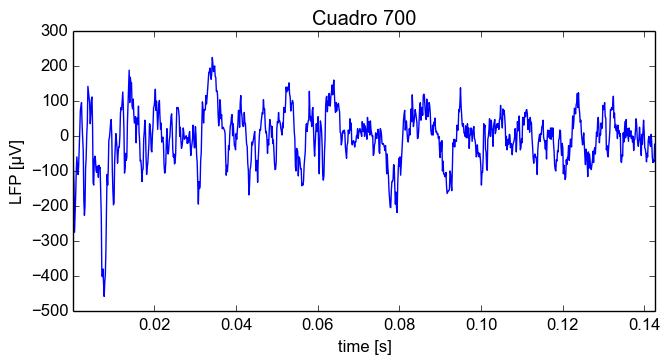

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f849d424250>

In [3]:
tiempo=1:1001
t=700
tit="Cuadro $t"
figure(figsize=(7.5,3.5))
PyPlot.xlim(1/7022,1001/7022)
xlabel("time [s]")
ylabel("LFP [µV]")
title(tit)
plot(tiempo/7022,ParaMostrar)

In [4]:
ParaMostrarSuave=readdlm("EjemploPlaticaSuave01.dat");

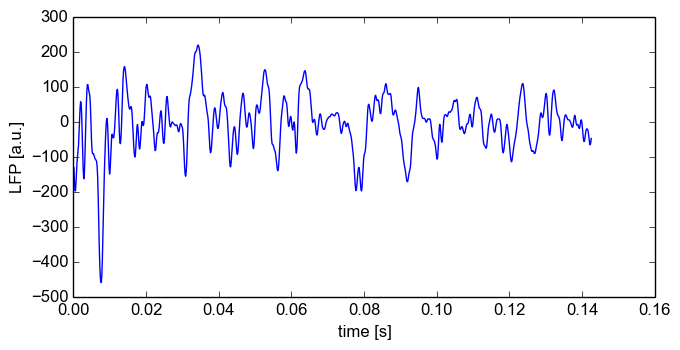

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8494cdcf10>

In [5]:
tiempo=1:1001
figure(figsize=(7.5,3.5))
xlabel("time [s]")
ylabel("LFP [a.u.]")
plot(tiempo/7022,ParaMostrarSuave)

In [40]:
function DropPeques(data)
    #solo funciona con data de dos indices.
    renglones,colus=size(data)
    prom=mean(abs(data[3]))
    result=zeros(1,colus)
    for k=1:renglones
        if abs(data[k,3])>prom
            result=vcat(result,data[k,:])
        end
    end
    return result
end

DropPeques (generic function with 1 method)

In [26]:
EjemploCentrosCSDPos

41x3 Array{Float64,2}:
  0.0      0.0         0.0   
 50.5624  62.2906     57.381 
 32.1022  23.4139    149.953 
 13.0555  27.1607     66.9416
 50.6382  55.471     155.636 
 52.8339  18.895      27.0017
 52.8497  52.5984    553.021 
 25.4857   4.98255   906.641 
 24.2553  19.8894    118.922 
 50.8093  42.8313    719.591 
 60.0753  26.586     362.702 
 40.2569   4.01917   477.626 
 27.1668   1.0        39.2913
  ⋮                          
 51.7496  22.4009     57.3674
 40.1462  10.6884     57.2561
 45.0991  11.815     146.882 
 32.2904  32.1834    176.959 
 63.923   57.6501     41.4621
 41.9457  18.4967   1049.18  
 56.4579  11.7608    296.414 
 56.0981  10.2912    768.008 
 25.4979  43.6236    895.122 
 43.0958  34.2333    126.695 
 13.8899   3.1486     55.6214
 28.3994  17.3444    950.412 

In [24]:
t=700
EjemploCentrosCSDPos=readdlm("GarbageCollector/CMPosLapla-$t.dat")
EjemploCentrosCSDPos=DropPeques(EjemploCentrosCSDPos)
xxpos=EjemploCentrosCSDPos[:,1]
yypos=EjemploCentrosCSDPos[:,2]
valorpos=EjemploCentrosCSDPos[:,3]
EjemploCentrosCSDNeg=readdlm("GarbageCollector/CMNegLapla-$t.dat")
EjemploCentrosCSDNeg=DropPeques(EjemploCentrosCSDNeg)
xxneg=EjemploCentrosCSDNeg[:,1]
yyneg=EjemploCentrosCSDNeg[:,2]
valorneg=EjemploCentrosCSDNeg[:,3];
CSDEjemplo=readdlm("GarbageCollector/CSD-$t.dat")

64x64 Array{Float64,2}:
   1.73147     1.20315     9.60132  …    4.24224   12.1614    -15.2159   
   4.06785    -4.92368   -11.6473      -10.0716   -12.4907      2.20928  
  24.6387     -0.289458   -4.70815     -12.0756   -18.0886      5.89998  
   8.84776   -18.0728     -5.32508      12.6789    -7.63535     3.12058  
  -2.28605    -6.83618   -10.1583       -3.33588   -2.11978    17.5649   
   3.21098     9.41189    -1.70281  …   -1.73784   10.1357     -3.85479  
  11.2866     -5.77577    -5.99205     -17.9062     5.51874   -24.7819   
   1.49688   -17.4896     -8.35312     -31.4769     6.43823    -0.0889482
  -2.46977    -5.77374    12.2008      -16.6838     5.03041    -5.0169   
  -6.46895    15.7613     20.864         5.46721   15.7438     -8.48351  
   6.04699    20.6522      6.42756  …   17.8612    32.8607      1.40967  
   0.391977    7.69516   -14.4744        8.44052   15.8456    -10.9484   
  -9.61319     6.12813    -7.81544       5.77773    9.19315   -22.7482   
   ⋮          

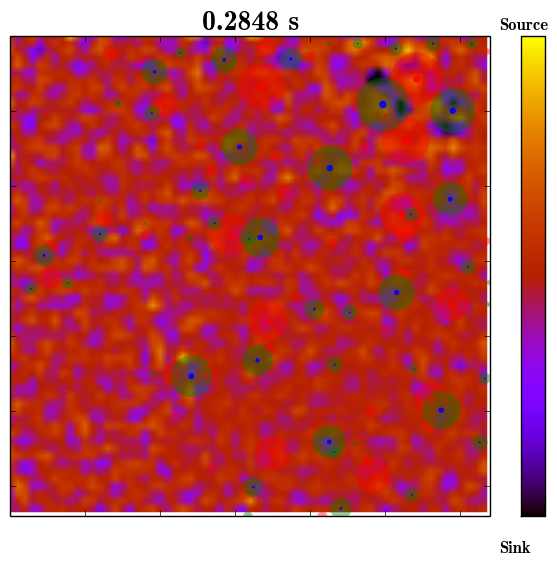

false

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Signerica Thin'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [41]:
PyPlot.ion()
#################
font1 = ["family"=>"Signerica Medium",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>20]
seg=round(t/7022, 4)
titulo="$seg s"
figure()
PyPlot.xlim(0,64)
PyPlot.ylim(64,0)
tick_params(labelbottom="off", labelleft="off")
otraimagen=imshow(CSDEjemplo, cmap="gnuplot", origin="upper", vmin=-70, vmax=70)
#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True")
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)
scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="g", edgecolors="none")
scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="r", edgecolors="none")
scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="b", edgecolors="none")

annotate("Sink",
    xy=[1.05;-0.11],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
font_properties="Signerica Thin",
    fontsize=24.0,
    ha="left",
    va="bottom")

annotate("Source",
    xy=[1.05;0.98],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
font_properties=("Signerica Thin"),
    fontsize=24,
    ha="left",
   va="bottom")

title(titulo, fontdict=font1)
 #tight_layout()
#savefig("CSD_nocb-$t.png", dpi=36)
PyPlot.close_queued_figs()

In [44]:
dedonde, adonde = 571, 2000
PyPlot.ioff()

In [45]:
@time for t=dedonde:adonde
    #read the data
    EjemploCentrosCSDPos=readdlm("GarbageCollector/CMPosLapla-$t.dat")
    EjemploCentrosCSDPos=DropPeques(EjemploCentrosCSDPos)
    
    xxpos=EjemploCentrosCSDPos[:,1]
    yypos=EjemploCentrosCSDPos[:,2]
    valorpos=EjemploCentrosCSDPos[:,3]
    EjemploCentrosCSDNeg=readdlm("GarbageCollector/CMNegLapla-$t.dat")
    EjemploCentrosCSDNeg=DropPeques(EjemploCentrosCSDNeg)

    xxneg=EjemploCentrosCSDNeg[:,1]
    yyneg=EjemploCentrosCSDNeg[:,2]
    valorneg=EjemploCentrosCSDNeg[:,3];
    CSDEjemplo=readdlm("GarbageCollector/CSD-$t.dat");
    #plot the data
    figure()
    seg=round(t/7022, 4)
    titulo="$seg s"
    PyPlot.xlim(0,63.5)
    PyPlot.ylim(63.5,0)
    
    otraimagen=imshow(CSDEjemplo, cmap="gnuplot", origin="upper", vmin=-70, vmax=70)
    #cb=colorbar(otraimagen)
    cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04 )
    cb[:set_ticklabels]([{""}, {""}])
    
    cb[:set_ticklabels](["Sink", "Source"])
    cb[:ax][:tick_params](labelsize=12)

    
    scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r")
    scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="g")
    scatter(xxpos,yypos, s=0.01*valorpos, alpha=0.95, c="r", edgecolors="none")
    scatter(xxneg, yyneg,s=0.01*abs(valorneg), alpha=0.95, c="b", edgecolors="none")
    #plot(xxpos,yypos, "k+")
    #plot(xxneg, yyneg,"k+")

    title(titulo, fontdict=font1)
    savefig("GarbageCollector/CSD_CM_artsy-$t.png", dpi=72)
    PyPlot.close_queued_figs()
    gc()
end

elapsed time: 292.859927119 seconds (1036945208 bytes allocated, 13.44% gc time)


In [15]:
gc()

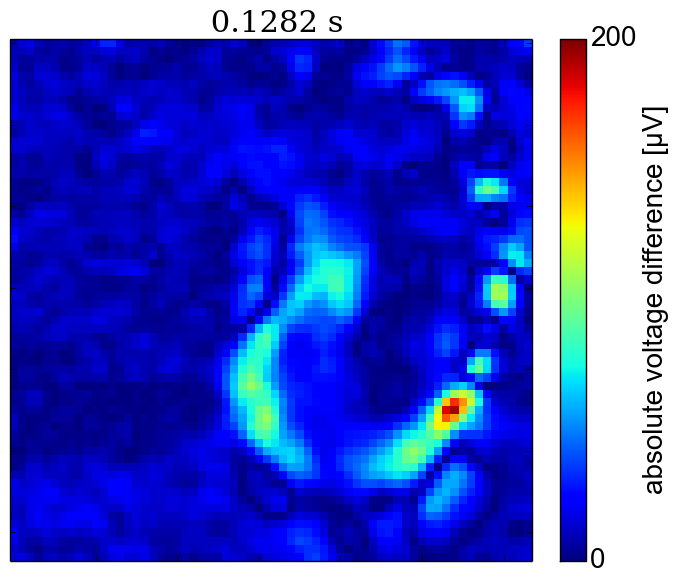

In [7]:
#guacala de jet. pero les gusta a los Journ. de Neurosc.
PyPlot.ion()
#for t=dedonde+10:adonde
t=900
lala=figure()
tick_params(labelbottom="off", labelleft="off")
b=round(t/7022, 4)
titulo=" $b s"
DatosSuaves=readdlm("GarbageCollector/LFPSuave-$t.dat")
imagen=imshow(abs(DatosSuaves), origin="upper", vmin=0, vmax=200, interpolation="none")
cb=colorbar(imagen, ticks=[-200, 0, +200],fraction=0.046, pad=0.04, use_gridspec="True" )
cb[:set_label]("absolute voltage difference [µV]  ", fontsize=20)
cb[:ax][:tick_params](labelsize=20)
title(titulo, fontdict=font1)
tight_layout()
savefig("AbsLFP_cb-$t.svg", dpi=36)
PyPlot.close_queued_figs()
gc()
#end